In [10]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

import pandas as pd

ir = pd.read_csv('iris.csv')

y = ir['species'].astype(str)
x = ir[list(ir.columns)[:-1]]

boston = load_boston()
reg = DecisionTreeClassifier()
#print (cross_val_score(reg, boston.data, boston.target, cv=10))
#print (cross_val_score(reg, x, y,cv=10))

[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 0.93333333 1.         1.        ]


In [12]:
dt = reg.fit(x,y)

In [13]:
print(dt)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [14]:
dt.tree_

In [15]:
from sklearn import tree
with open('visual.svg', 'w') as fp:
    tree.export_graphviz(dt, out_file=fp, class_names=['Sentosa', 'Virginica', 'Versicol'])

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML

df = pd.read_excel('Churn.xls',sheet_name='churn')
display(df.head(5))

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [17]:
df.dtypes

Account Length      int64
VMail Message       int64
Day Mins          float64
Eve Mins          float64
Night Mins        float64
Intl Mins         float64
CustServ Calls      int64
Churn               int64
Int'l Plan          int64
VMail Plan          int64
Day Calls           int64
Day Charge        float64
Eve Calls           int64
Eve Charge        float64
Night Calls         int64
Night Charge      float64
Intl Calls          int64
Intl Charge       float64
State              object
Area Code           int64
Phone              object
dtype: object

In [18]:
df = df.drop(["Phone", 'Area Code', 'State'], axis=1)
features = df.drop(['Churn'], axis=1).columns

In [20]:
print (features)

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Int'l Plan', 'VMail Plan', 'Day Calls',
       'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge',
       'Intl Calls', 'Intl Charge'],
      dtype='object')


In [22]:
df_train, df_test = train_test_split(df, test_size=0.25)
model = RandomForestClassifier(max_depth=10, min_samples_split=2,
                              n_estimators=100, random_state=1)
model.fit(df_train[features], df_train['Churn'])

preds = model.predict(df_test[features])
probs = model.predict_proba(df_test[features])

print(preds)
print(probs)

[1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 

In [23]:
from sklearn import metrics
print ("accuracy: ", metrics.accuracy_score(df_test['Churn'],preds))

accuracy:  0.9496402877697842


In [24]:
print(metrics.classification_report(df_test['Churn'],preds))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97       722
          1       0.90      0.71      0.79       112

avg / total       0.95      0.95      0.95       834



In [25]:
print(metrics.confusion_matrix(df_test['Churn'],preds))

[[713   9]
 [ 33  79]]


In [26]:
df.shape

(3333, 18)

In [37]:
get_ipython().magic('matplotlib inline')
confusion_matrix = pd.DataFrame(
    confusion_matrix(df_test["Churn"], preds), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
display(confusion_matrix)

# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(df_test["Churn"], probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

TypeError: 'DataFrame' object is not callable

In [44]:
print(preds, df_test)
get_ipython().magic('matplotlib inline')
confusion_matrix = pd.DataFrame(
    confusion_matrix(df_test["Churn"], preds), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
print(confusion_matrix)



[1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 

TypeError: 'DataFrame' object is not callable

In [39]:
DataFrame

NameError: name 'DataFrame' is not defined

,importance,labels
2,0.151713,Day Mins
10,0.142447,Day Charge
6,0.125607,CustServ Calls
7,0.090853,Int'l Plan
3,0.063591,Eve Mins


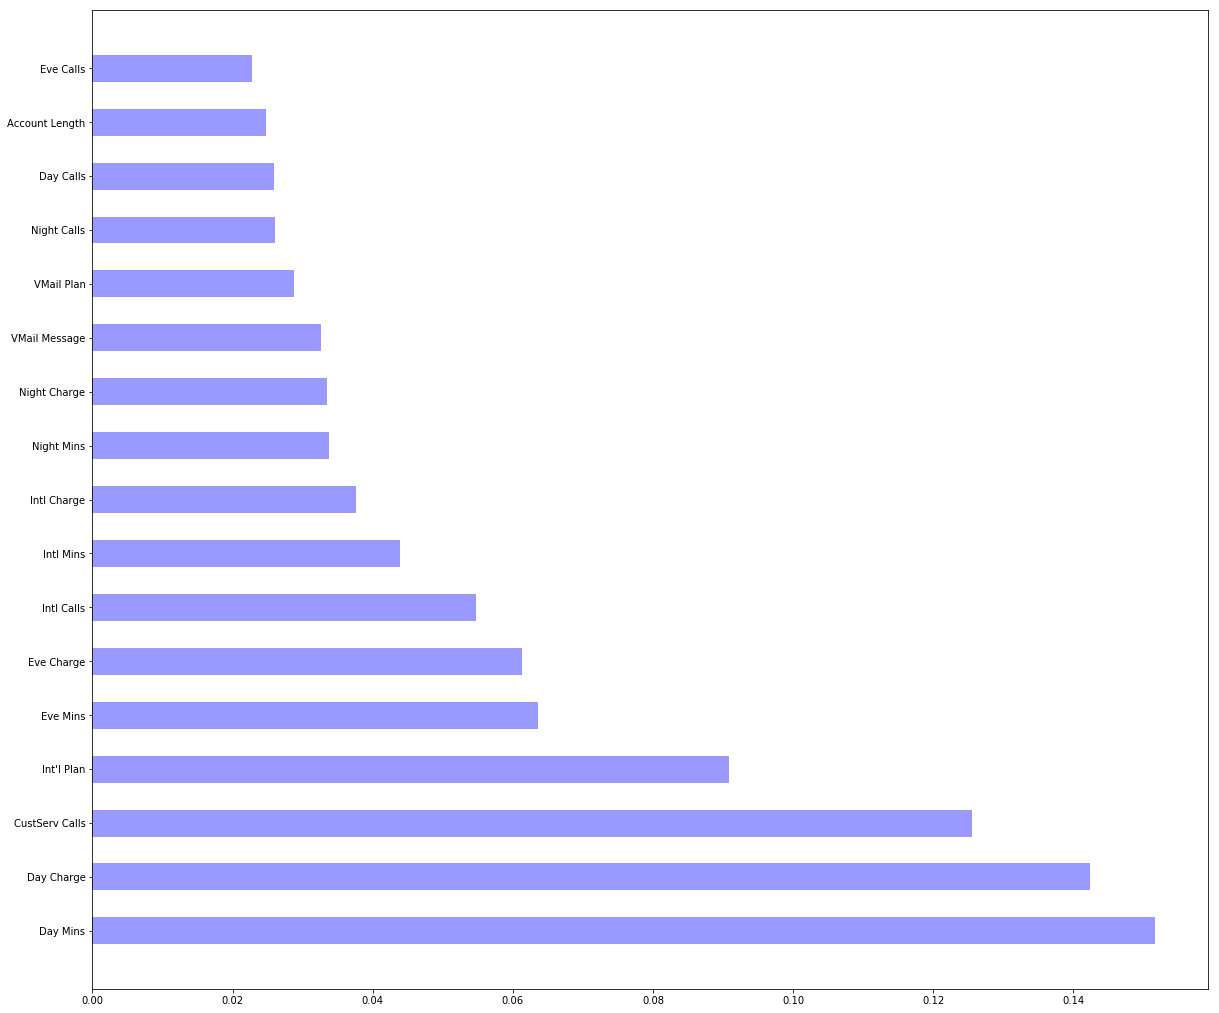

In [47]:
import numpy as np
fig = plt.figure(figsize=(20,18))
ax = fig.add_subplot(111)

df_f = pd.DataFrame(model.feature_importances_,columns=['importance'])
df_f['labels'] = features
df_f.sort_values('importance', inplace=True, ascending=False)
display(df_f.head(5))

index = np.arange(len(model.feature_importances_))
bar_width = 0.5
rects = plt.barh(index, df_f['importance'],bar_width,alpha=0.4,color='b',label='Main')
plt.yticks(index, df_f['labels'])
plt.show()

In [53]:
df_test['prob_true']=probs[:,1]
df_risky = df_test[df_test['prob_true']>0.9]
print(df_risky.head(5)[['prob_true']])
type(df_risky)

      prob_true
3132   0.960830
2210   0.918730
2103   0.950928
3272   0.948885
629    0.907669


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


pandas.core.frame.DataFrame